In [29]:
#Author : Sateesh K
#Date   : 17/May/2020
#Purpose: As a part of UpX project, this is a submission to complete Capstone project
#Guidelines: 
#Prepare the report in form of a power point presentation. Below
#are the guidelines for the report.
#a. Domain & topic of project
#b. Introduction (brief info on project)
#c. Dataset description
#d. Business questions identified (at least 7-8 questions)
#General format:
#Question 1
#Approach
#Findings & Visualizations
#e. Cleaning data and data imputation
#f. Train-test data split
#g. Model building, training and testing
#h. Performance metrics
#2. Use at least three algorithms learned from the Machine Learning track for the
#project.

In [2]:
#Load the data from .csv into a data-frame
import pandas as pd
initial_df = pd.read_csv('AirQualityUCI.csv')
initial_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
#Check for null values
print(initial_df.isnull().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [4]:
#Print the null values of Date column to observe how the data looks.
initial_df[initial_df['Date'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Insert meaningful values for Date NaN
#Get 100 rows above the first NaN date value
initial_df.loc[9337:9357,:]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9337,4/3/2005,19:00:00,2.7,1248.0,-200.0,11.1,1018.0,367.0,599.0,181.0,1289.0,1167.0,19.9,33.0,0.7608,NaN,NaN
9338,4/3/2005,20:00:00,2.5,1180.0,-200.0,7.9,894.0,355.0,636.0,187.0,1200.0,1372.0,17.5,40.7,0.8073,NaN,NaN
9339,4/3/2005,21:00:00,1.5,1102.0,-200.0,6.0,812.0,235.0,693.0,158.0,1178.0,1042.0,16.4,46.6,0.8642,NaN,NaN
9340,4/3/2005,22:00:00,1.6,1116.0,-200.0,5.8,803.0,233.0,696.0,153.0,1173.0,1055.0,15.5,49.0,0.8579,NaN,NaN
9341,4/3/2005,23:00:00,1.2,1100.0,-200.0,5.1,769.0,170.0,722.0,128.0,1147.0,1049.0,14.3,52.5,0.8497,NaN,NaN
9342,4/4/2005,0:00:00,0.9,1012.0,-200.0,3.5,683.0,117.0,801.0,93.0,1073.0,816.0,14.2,51.4,0.8275,NaN,NaN
9343,4/4/2005,1:00:00,0.6,944.0,-200.0,1.9,579.0,70.0,925.0,58.0,1002.0,598.0,13.8,51.2,0.8058,NaN,NaN
9344,4/4/2005,2:00:00,0.5,912.0,-200.0,1.5,544.0,69.0,959.0,55.0,1002.0,573.0,12.1,56.3,0.7927,NaN,NaN
9345,4/4/2005,3:00:00,0.4,887.0,-200.0,1.1,508.0,62.0,1047.0,51.0,974.0,549.0,11.3,58.9,0.7888,NaN,NaN
9346,4/4/2005,4:00:00,-200.0,864.0,-200.0,0.8,478.0,52.0,1116.0,43.0,958.0,489.0,11.8,56.0,0.7743,NaN,NaN


In [31]:
#Observing the data, each data has a data point per hour
#However all the column of Date NaN also have a NaN
#Hence it makes sense to drop all NaN rows which amount to 114 data points out of 9471 data points = 0.11%
initial_df.dropna(subset=['Date'],inplace=True)
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 1230
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           827 non-null    object 
 1   Time           827 non-null    object 
 2   CO(GT)         827 non-null    float64
 3   PT08.S1(CO)    827 non-null    float64
 4   NMHC(GT)       827 non-null    float64
 5   C6H6(GT)       827 non-null    float64
 6   PT08.S2(NMHC)  827 non-null    float64
 7   NOx(GT)        827 non-null    float64
 8   PT08.S3(NOx)   827 non-null    float64
 9   NO2(GT)        827 non-null    float64
 10  PT08.S4(NO2)   827 non-null    float64
 11  PT08.S5(O3)    827 non-null    float64
 12  T              827 non-null    float64
 13  RH             827 non-null    float64
 14  AH             827 non-null    float64
dtypes: float64(13), object(2)
memory usage: 103.4+ KB


In [7]:
#Now check if the Date filed no longer as NaN
initial_df[initial_df['Date'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16


## All NaN in Date filed are dropped off, hence lost 114 rows out of 9471 rows of data.


In [8]:
#Now check over-all NaN in data-set
#Check for null values
print(initial_df.isnull().sum())

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64


In [9]:
#Column 15 and 16 has no valid data, so need to dop them as well.
initial_df.drop(initial_df.filter(regex="Unnamed"),axis=1, inplace=True)
initial_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## As NaN in Date co-incided with NaN in other column, now there are no more NaN, Data is cleaned-up for further processing.


In [10]:
#Copy into a new Pandas Data-frame for clarity purposes only
cleaned_up_df = initial_df
cleaned_up_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [11]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df)
#print(profile)


,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94
2,Tina,Ali,36,31,57
3,Jake,Milner,24,2,62
4,Amy,Cooze,73,3,70


In [12]:
#There is a problem with pandas_profile , hence ditching it. In fact pandas profile does not work even with a simple data-frame.

In [13]:
cleaned_up_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


NameError: name 'plt' is not defined

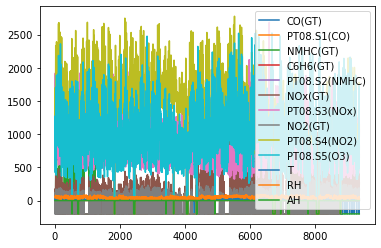

In [14]:
#Remove date and time for plotting purposes
temp_df = cleaned_up_df
#temp_df.drop(columns=['Date','Time']) #This line causes error if executed mutiple times as 
#'Date' and 'Time' no longer esist after
#first run
temp_df.plot()
plt.show()

In [25]:
#From above graph it is clear that -200 is an invalid value which needs to be got rid of.
#The idea is to count the number of -200 and decide if those rows of data can be dropped off.
count_of_minus_200=0
for col_id in cleaned_up_df:
    print(col_id)
    count_of_minus_200 = len(cleaned_up_df.loc[cleaned_up_df[col_id] == -200])
    count_of_minus_200 += count_of_minus_200 
print("The count of rows that have -200 value in them:",count_of_minus_200)

Date
Time
CO(GT)
PT08.S1(CO)
NMHC(GT)
C6H6(GT)
PT08.S2(NMHC)
NOx(GT)
PT08.S3(NOx)
NO2(GT)
PT08.S4(NO2)
PT08.S5(O3)
T
RH
AH
The count of rows that have -200 value in them: 732


In [26]:
#Since it is only 732 rows, iterate again and drop those rows with value of -200 in them.
for col_id in cleaned_up_df:
    cleaned_up_df.drop(cleaned_up_df.loc[cleaned_up_df[col_id] == -200].index, inplace=True)

In [27]:
#Check if all -200s are gone, iterate again
count_of_minus_200=0
for col_id in cleaned_up_df:
    print(col_id)
    count_of_minus_200 = len(cleaned_up_df.loc[cleaned_up_df[col_id] == -200])
    count_of_minus_200 += count_of_minus_200 
print("The count of rows that have -200 value in them:",count_of_minus_200)

Date
Time
CO(GT)
PT08.S1(CO)
NMHC(GT)
C6H6(GT)
PT08.S2(NMHC)
NOx(GT)
PT08.S3(NOx)
NO2(GT)
PT08.S4(NO2)
PT08.S5(O3)
T
RH
AH
The count of rows that have -200 value in them: 0


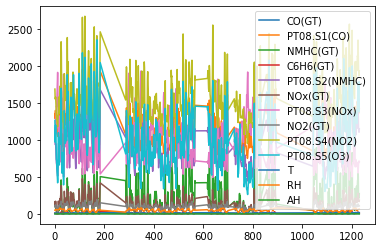

In [28]:
#Now you will see a more clean-plot
cleaned_up_df.plot()

In [30]:
cleaned_up_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 1230
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           827 non-null    object 
 1   Time           827 non-null    object 
 2   CO(GT)         827 non-null    float64
 3   PT08.S1(CO)    827 non-null    float64
 4   NMHC(GT)       827 non-null    float64
 5   C6H6(GT)       827 non-null    float64
 6   PT08.S2(NMHC)  827 non-null    float64
 7   NOx(GT)        827 non-null    float64
 8   PT08.S3(NOx)   827 non-null    float64
 9   NO2(GT)        827 non-null    float64
 10  PT08.S4(NO2)   827 non-null    float64
 11  PT08.S5(O3)    827 non-null    float64
 12  T              827 non-null    float64
 13  RH             827 non-null    float64
 14  AH             827 non-null    float64
dtypes: float64(13), object(2)
memory usage: 103.4+ KB
